<a href="https://colab.research.google.com/github/ben45123/AWS-Lambda-Research/blob/main/AppleDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew

#Cleaning

In [ ]:
'''
Cleaning

Plan:
1. load data
2. Remove Unnecessaries
3. Rename the Columns
4. Clear Dupes
5. Remove NaN values
6. Clean individual columns ugh
'''

'\nCleaning\n\nPlan:\n1. load data\n2. Remove Unnecessaries\n3. Rename the Columns\n4. Clear Dupes\n5. Remove NaN values\n6. Clean individual columns ugh\n'

Csv load

In [ ]:
# Load the dataset
df = pd.read_csv('AppleStore.csv', skipinitialspace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [ ]:
print("empty column entry count")
print(df.isnull().sum())

empty column entry count
Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64


In [ ]:
print("empty column entry percentage")
print(df.isnull().sum()/len(df)*100)


empty column entry percentage
Unnamed: 0          0.0
id                  0.0
track_name          0.0
size_bytes          0.0
currency            0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
user_rating         0.0
user_rating_ver     0.0
ver                 0.0
cont_rating         0.0
prime_genre         0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
vpp_lic             0.0
dtype: float64


Drop Columns

In [ ]:
#operation complete
#df.drop(columns=[""],inplace=True)

#unnecessary columns: Unnamed: 0, id, currency, ipadSc_urls.num, vpp_lic
#Redundant columns:
df.drop(columns={
"Unnamed: 0",
"id",
"size_bytes",
"currency",
"ipadSc_urls.num",
"vpp_lic"
},
axis=1
,inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   price             7197 non-null   float64
 2   rating_count_tot  7197 non-null   int64  
 3   rating_count_ver  7197 non-null   int64  
 4   user_rating       7197 non-null   float64
 5   user_rating_ver   7197 non-null   float64
 6   ver               7197 non-null   object 
 7   cont_rating       7197 non-null   object 
 8   prime_genre       7197 non-null   object 
 9   sup_devices.num   7197 non-null   int64  
 10  lang.num          7197 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 618.6+ KB
None


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   price             7197 non-null   float64
 2   rating_count_tot  7197 non-null   int64  
 3   rating_count_ver  7197 non-null   int64  
 4   user_rating       7197 non-null   float64
 5   user_rating_ver   7197 non-null   float64
 6   ver               7197 non-null   object 
 7   cont_rating       7197 non-null   object 
 8   prime_genre       7197 non-null   object 
 9   sup_devices.num   7197 non-null   int64  
 10  lang.num          7197 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 618.6+ KB


In [ ]:
print(df.sample(20))

                                        track_name  price  rating_count_tot  \
3633                             OPERATION DRACULA   2.99                64   
2031                               Trials Frontier   0.00             29090   
6977                Vandermojis by Lisa Vanderpump   1.99                12   
6267                       Shopkins: Shoppie Dash!   3.99               278   
1593                                   ReindeerCam   1.99              3379   
2896                               Digimon Heroes!   0.00              3144   
6932                   DurantEmoji by Kevin Durant   0.00               200   
131                     radio.de - Der Radioplayer   0.00                64   
624                                       GasBuddy   0.00            145549   
6721               Jumps - Jumping on Pillars Game   0.00                35   
535                                      Noteshelf   9.99              7562   
3785                                  Swaggy Ninja  

Rename Columns

In [ ]:
df.rename(columns={
    'track_name':'appName',
    'prime_genre':'category',
    'rating_count_tot':'userRatings',
    'rating_count_ver':'userRatingsCurrent',
    'user_rating':'averageRating',
    'user_rating_ver':'averageRatingCurrent',
    'ver':'version',
    'cont_rating':'contentRating',
    'sup_devices.num':'supportingDevices',
    'lang.num':'supportedLanguages'
},inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appName               7197 non-null   object 
 1   price                 7197 non-null   float64
 2   userRatings           7197 non-null   int64  
 3   userRatingsCurrent    7197 non-null   int64  
 4   averageRating         7197 non-null   float64
 5   averageRatingCurrent  7197 non-null   float64
 6   version               7197 non-null   object 
 7   contentRating         7197 non-null   object 
 8   category              7197 non-null   object 
 9   supportingDevices     7197 non-null   int64  
 10  supportedLanguages    7197 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 618.6+ KB
None


Duplication Check

In [ ]:
df.duplicated().value_counts()

,count
False,7197


In [ ]:
df.drop_duplicates(inplace=True)

NaN Checking

In [ ]:
df.isna().sum()

,0
appName,0
price,0
userRatings,0
userRatingsCurrent,0
averageRating,0
averageRatingCurrent,0
version,0
contentRating,0
category,0
supportingDevices,0


In [ ]:
df.dropna(inplace=True)

Check if Entries are even

In [ ]:
df

,appName,price,userRatings,userRatingsCurrent,averageRating,averageRatingCurrent,version,contentRating,category,supportingDevices,supportedLanguages
0,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,10
1,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,9
4,Bible,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,Kubik,0.00,142,75,4.5,4.5,1.3,4+,Games,38,1
7193,VR Roller-Coaster,0.00,30,30,4.5,4.5,0.9,4+,Games,38,1
7194,Bret Michaels Emojis + Lyric Keyboard,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1
7195,VR Roller Coaster World - Virtual Reality,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   appName               7197 non-null   object  
 1   price                 7197 non-null   float64 
 2   userRatings           7197 non-null   int64   
 3   userRatingsCurrent    7197 non-null   int64   
 4   averageRating         7197 non-null   float64 
 5   averageRatingCurrent  7197 non-null   float64 
 6   version               7197 non-null   object  
 7   contentRating         7197 non-null   category
 8   category              7197 non-null   category
 9   supportingDevices     7197 non-null   int64   
 10  supportedLanguages    7197 non-null   int64   
dtypes: category(2), float64(3), int64(4), object(2)
memory usage: 521.1+ KB


In [ ]:
df.sample(20)

,appName,price,userRatings,userRatingsCurrent,averageRating,averageRatingCurrent,version,contentRating,category,supportingDevices,supportedLanguages
6049,voi,0.99,308,192,4.5,4.5,1.1.0,4+,Games,43,12
7131,PetMojis' by The Dog Agency,0.99,79,2,2.0,1.0,1.1.1,4+,Entertainment,37,1
3555,Laundry Day - Care Symbol Reader,0.99,34,34,4.5,4.5,1.0,4+,Productivity,38,2
1410,どうぶつしょうぎ(公式),0.99,1,1,4.0,4.0,1.0,4+,Games,43,1
2498,InsSave - Download & Save Photos & Videos From...,0.99,107,97,3.0,3.0,1.2,4+,Social Networking,38,1
6087,Tiki Taka World Soccer,2.99,9,8,2.0,2.0,1.02,4+,Games,40,1
3037,CreamCam+ auto selfie enhancer,1.99,25,0,3.5,0.0,4.03,4+,Photo & Video,37,33
6164,Anime Power FX,0.00,807,807,4.5,4.5,1.0,9+,Photo & Video,37,1
788,Bank of America - Mobile Banking for iPad,0.00,7569,31,3.5,3.0,7.3.8,4+,Finance,24,1
6379,Hillarymoji,0.00,42,3,3.5,3.0,2.0,17+,Entertainment,37,1


Column checking

In [ ]:
#Done:  Price + AppName + Category + averageRatingCurrent + averageRating + userRatingsCurrent + userRatings
print(
    "averageRatingCurrent: " + str(df['averageRatingCurrent'].dtype) + "\n"
    "averageRating: " + str(df['averageRating'].dtype) + "\n"
    "Price: " + str(df['price'].dtype) + "\n"
    "userRatingsCurrent: " + str(df['userRatingsCurrent'].dtype) + "\n"
    "userRatings: " + str(df['userRatings'].dtype) + "\n"
    "Category: " + str(df["category"].dtype) + "\n"
    "AppName: " + str(df['appName'].dtype) + "\n"
    "version: " + str(df['version'].dtype) + "\n"
    "contentRating: " + str(df['contentRating'].dtype) + "\n"
    "supportingDevices: " + str(df['supportingDevices'].dtype) + "\n"
    "supportedLanguages: " + str(df['supportedLanguages'].dtype) + "\n"
    )

averageRatingCurrent: float64
averageRating: float64
Price: float64
userRatingsCurrent: int64
userRatings: int64
Category: category
AppName: string
version: string
contentRating: category
supportingDevices: int64
supportedLanguages: int64



In [ ]:
#entries reindexed without nans or dupes
df.reset_index(drop=True,inplace=True)

Price and appname, version

In [ ]:
df["price"] = df["price"].astype(float)

In [ ]:
df["appName"] = df["appName"].astype(pd.StringDtype())

In [ ]:
df["version"] = df["version"].astype(pd.StringDtype())

category

In [ ]:
df['category'].value_counts()

,count
category,
Games,3862
Entertainment,535
Education,453
Photo & Video,349
Utilities,248
Health & Fitness,180
Productivity,178
Social Networking,167
Lifestyle,144


In [ ]:
df["category"] = pd.Categorical(
    df["category"],
    categories=df["category"].str.strip().str.title().unique(),
    ordered=False
)

Ratings

In [ ]:
df["userRatingsCurrent"] = df["userRatingsCurrent"].astype(int)
df["userRatings"] = df["userRatings"].astype(int)

In [ ]:
df["averageRatingCurrent"] = df["averageRatingCurrent"].astype(float)
df["averageRating"] = df["averageRating"].astype(float)

In [ ]:
df["contentRating"] = pd.Categorical(
    df["contentRating"],
    categories=df["contentRating"].str.strip().str.title().unique(),
    ordered=False
)

In [ ]:
df

,appName,price,userRatings,userRatingsCurrent,averageRating,averageRatingCurrent,version,contentRating,category,supportingDevices,supportedLanguages
0,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,10
1,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,9
4,Bible,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,Kubik,0.00,142,75,4.5,4.5,1.3,4+,Games,38,1
7193,VR Roller-Coaster,0.00,30,30,4.5,4.5,0.9,4+,Games,38,1
7194,Bret Michaels Emojis + Lyric Keyboard,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1
7195,VR Roller Coaster World - Virtual Reality,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,2


Export

In [ ]:
#Data is cleaned now and this will probably be the final version of this dataset
df.to_csv("cleanedAppleStore.csv", index=False)
df.to_excel("cleanedAppleStore.csv.xlsx")

#Preprocessing Time

In [ ]:
#changed filepath from local access to URL access
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6IxRYAfKilSJCnLUtie8faVsAtTRZ4tSduZ8t6GnnW7GrS-Dai_pfogtF-7tQ8o9cApd3Evna9VIx/pub?gid=1259328418&single=true&output=csv")

In [ ]:
df.sample(5)

,appName,price,userRatings,userRatingsCurrent,averageRating,averageRatingCurrent,version,contentRating,category,supportingDevices,supportedLanguages
3385,Runestone Keeper,2.99,95,38,4.5,4.0,1.2.0,9+,Games,40,8
6319,Crazy Circle,0.00,98,65,4.5,4.5,1.0.1,4+,Games,38,1
702,iTheme - Themes for iPhone and iPad,1.99,4719,61,4.0,4.5,5.1,4+,Lifestyle,37,23
3963,WSwitch for Belkin WeMo,1.99,138,82,2.5,2.0,1.3,4+,Utilities,37,1
330,Jourist Weltübersetzer,7.99,0,0,0.0,0.0,2.8,4+,Travel,40,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appName               7197 non-null   object 
 1   price                 7197 non-null   float64
 2   userRatings           7197 non-null   int64  
 3   userRatingsCurrent    7197 non-null   int64  
 4   averageRating         7197 non-null   float64
 5   averageRatingCurrent  7197 non-null   float64
 6   version               7197 non-null   object 
 7   contentRating         7197 non-null   object 
 8   category              7197 non-null   object 
 9   supportingDevices     7197 non-null   int64  
 10  supportedLanguages    7197 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 618.6+ KB


In [ ]:
df.describe()

,price,userRatings,userRatingsCurrent,averageRating,averageRatingCurrent,supportingDevices,supportedLanguages
count,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,5.434903
std,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,7.919593
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000
25%,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,1.000000
50%,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,1.000000
75%,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,8.000000
max,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,75.000000


In [ ]:
df.dtypes

,0
appName,object
price,float64
userRatings,int64
userRatingsCurrent,int64
averageRating,float64
averageRatingCurrent,float64
version,object
contentRating,object
category,object
supportingDevices,int64


In [ ]:
df.columns

Index(['appName', 'price', 'userRatings', 'userRatingsCurrent',
       'averageRating', 'averageRatingCurrent', 'version', 'contentRating',
       'category', 'supportingDevices', 'supportedLanguages'],
      dtype='object')

In [ ]:
df['category'] = df['category'].astype('category')
df['contentRating'] = df['contentRating'].astype('category')
df['appName'] = df['appName'].astype(pd.StringDtype())
df['version'] = df['version'].astype(pd.StringDtype())

#Categorical Value Analysis

In [ ]:
# Define success metric - using userRatings as proxy for popularity
# Log transform to handle skewness
df['log_userRatings'] = np.log1p(df['userRatings'])

In [ ]:
# Run regression model
formula = 'log_userRatings ~ price + C(category) + C(contentRating) + averageRating + supportingDevices'
model = ols(formula, data=df).fit()

In [ ]:
# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_userRatings   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:18:41   Log-Likelihood:                -16587.
No. Observations:                7197   AIC:                         3.323e+04
Df Residuals:                    7168   BIC:                         3.343e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
print("\nTop 10 predictors by absolute t-value:")
t_values = []
for var in model.params.index:
    if var != 'const':  # Exclude the constant term
        # Calculate t-value (coefficient / std error)
        t_value = model.params[var] / model.bse[var]
        p_value = model.pvalues[var]
        coefficient = model.params[var]
        t_values.append((var, t_value, p_value, coefficient))

# Sort by absolute t-value
t_values.sort(key=lambda x: abs(x[1]), reverse=True)

# Print top 10 predictors by t-value
for i, (var, t_val, p_val, coef) in enumerate(t_values[:10]):
    print(f"{i+1}. {var}: t-value = {t_val:.4f}, p-value = {p_val:.4f}, coefficient = {coef:.4f}")


Top 10 predictors by absolute t-value:
1. averageRating: t-value = 74.3018, p-value = 0.0000, coefficient = 1.4489
2. C(category)[T.Social Networking]: t-value = 9.1266, p-value = 0.0000, coefficient = 2.7263
3. C(category)[T.Entertainment]: t-value = 7.0270, p-value = 0.0000, coefficient = 1.7787
4. C(category)[T.Sports]: t-value = 7.0256, p-value = 0.0000, coefficient = 2.2735
5. C(category)[T.Shopping]: t-value = 6.8491, p-value = 0.0000, coefficient = 2.1847
6. C(category)[T.Photo & Video]: t-value = 6.5828, p-value = 0.0000, coefficient = 1.7486
7. C(category)[T.Music]: t-value = 6.1705, p-value = 0.0000, coefficient = 1.9210
8. C(category)[T.Utilities]: t-value = 5.8633, p-value = 0.0000, coefficient = 1.6259
9. C(category)[T.Productivity]: t-value = 5.7982, p-value = 0.0000, coefficient = 1.7138
10. C(category)[T.Games]: t-value = 5.7787, p-value = 0.0000, coefficient = 1.3553


In [ ]:
# Also print the most significant categorical predictors
print("\nMost significant categorical predictors (p < 0.05):")
significant_predictors = []
for var in model.pvalues.index:
  if var != 'const' and model.pvalues[var] < 0.05:
      significant_predictors.append((var, model.params[var], model.pvalues[var]))

# Sort by absolute coefficient value
significant_predictors.sort(key=lambda x: abs(x[1]), reverse=True)

# Print top 10 most impactful significant predictors
for i, (var, coef, pval) in enumerate(significant_predictors[:10]):
  print(f"{var}: coefficient = {coef:.4f}, p-value = {pval:.13f}")

# Calculate and print model quality metrics
print("\nModel Quality Metrics:")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"Prob(F-statistic): {model.f_pvalue:.4f}")
print(f"AIC: {model.aic:.4f}")
print(f"BIC: {model.bic:.4f}")


Most significant categorical predictors (p < 0.05):
C(category)[T.Social Networking]: coefficient = 2.7263, p-value = 0.0000000000000
C(category)[T.Sports]: coefficient = 2.2735, p-value = 0.0000000000023
C(category)[T.Shopping]: coefficient = 2.1847, p-value = 0.0000000000080
C(category)[T.News]: coefficient = 2.0656, p-value = 0.0000000141099
C(category)[T.Business]: coefficient = 1.9341, p-value = 0.0000011433699
C(category)[T.Music]: coefficient = 1.9210, p-value = 0.0000000007180
C(category)[T.Weather]: coefficient = 1.7887, p-value = 0.0000012242004
C(category)[T.Entertainment]: coefficient = 1.7787, p-value = 0.0000000000023
C(category)[T.Photo & Video]: coefficient = 1.7486, p-value = 0.0000000000494
C(category)[T.Productivity]: coefficient = 1.7138, p-value = 0.0000000069869

Model Quality Metrics:
R-squared: 0.4630
Adjusted R-squared: 0.4609
F-statistic: 220.7518
Prob(F-statistic): 0.0000
AIC: 33232.7478
BIC: 33432.3090


In [ ]:
# Extract key statistics for each predictor
results = pd.DataFrame({
    'coefficient': model.params,
    'std_err': model.bse,
    't_value': model.tvalues,
    'p_value': model.pvalues
})

In [ ]:
# Filter for significant predictors (p < 0.05)
significant_predictors = results[results['p_value'] < 0.05].sort_values('t_value', key=abs, ascending=False)

In [ ]:
# Display top predictors
print("\nTop Predictors by Absolute t-value:")
display(significant_predictors)


Top Predictors by Absolute t-value:


,coefficient,std_err,t_value,p_value
averageRating,1.448861,0.019500,74.301841,0.000000e+00
C(category)[T.Social Networking],2.726264,0.298718,9.126556,9.042207e-20
C(category)[T.Entertainment],1.778651,0.253116,7.027010,2.304291e-12
C(category)[T.Sports],2.273517,0.323604,7.025625,2.327097e-12
C(category)[T.Shopping],2.184694,0.318975,6.849104,8.047498e-12
C(category)[T.Photo & Video],1.748565,0.265626,6.582816,4.942083e-11
C(category)[T.Music],1.921018,0.311325,6.170459,7.179847e-10
C(category)[T.Utilities],1.625942,0.277310,5.863268,4.740003e-09
C(category)[T.Productivity],1.713823,0.295577,5.798222,6.986938e-09
C(category)[T.Games],1.355320,0.234538,5.778686,7.844243e-09


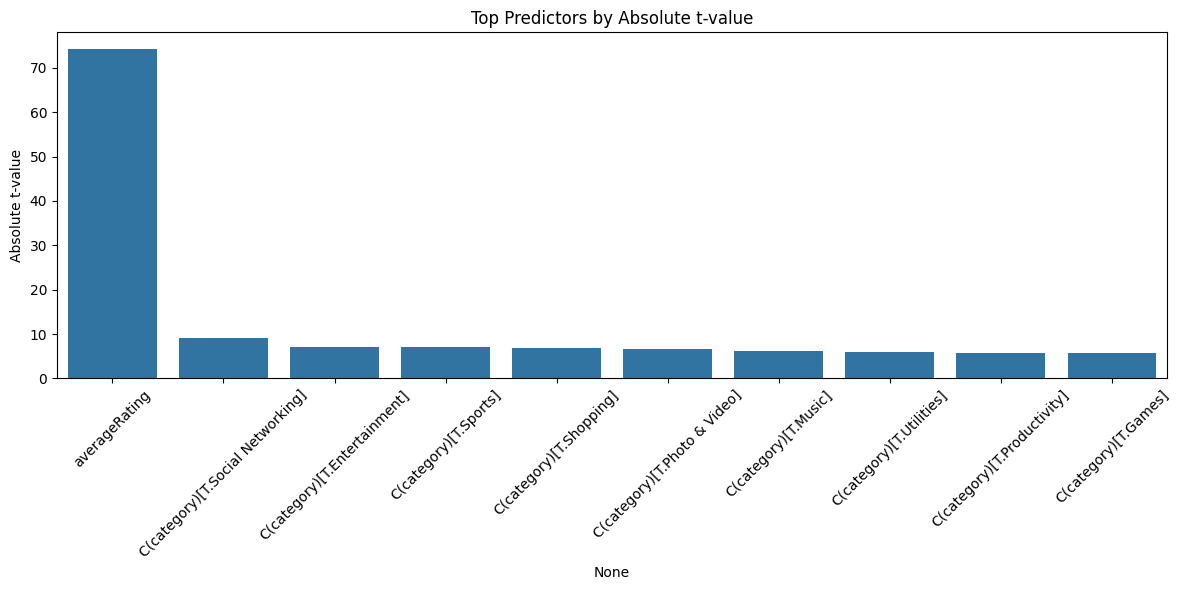

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=significant_predictors.index[:10],
            y=significant_predictors['t_value'].abs()[:10])
plt.title('Top Predictors by Absolute t-value')
plt.xticks(rotation=45)
plt.ylabel('Absolute t-value')
plt.tight_layout()
plt.show()

In [ ]:
category_counts = df['category'].value_counts()
print("Category Frequency:\n", category_counts)

Category Frequency:
 category
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: count, dtype: int64


In [ ]:
content_rating_counts = df['contentRating'].value_counts()
print("Content Rating Frequency:\n", content_rating_counts)

Content Rating Frequency:
 contentRating
4+     4433
12+    1155
9+      987
17+     622
Name: count, dtype: int64


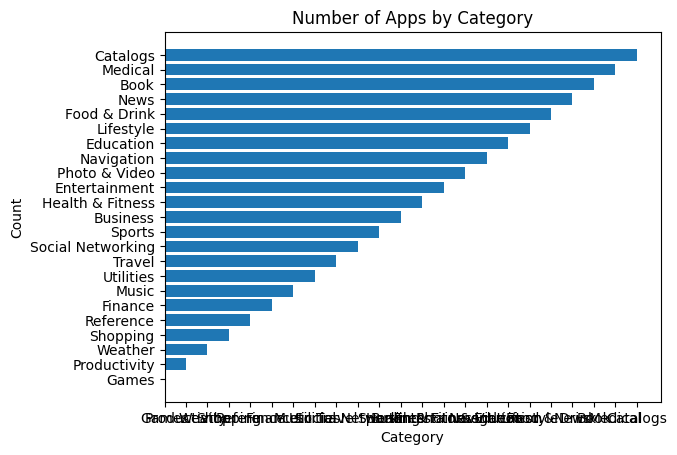

In [ ]:
# Bar plot for categories
#category_counts.plot(kind='bar')
plt.barh(df['category'], df['category'].values)
plt.title('Number of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

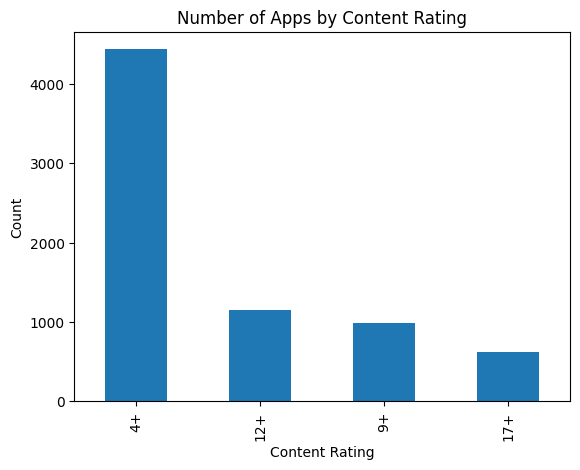

In [ ]:
# Bar plot for content ratings
content_rating_counts.plot(kind='bar')
plt.title('Number of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the average rating for each category
avg_rating_by_category = df.groupby('category')['averageRating'].mean()
med_rating_by_category = df.groupby('category')['averageRating'].median()
print("Average Rating by Category:\n", round(avg_rating_by_category, 2))
print("Median Rating by Category:\n", round(med_rating_by_category, 2))

Average Rating by Category:
 category
Book                 2.48
Business             3.75
Catalogs             2.10
Education            3.38
Entertainment        3.25
Finance              2.43
Food & Drink         3.18
Games                3.69
Health & Fitness     3.70
Lifestyle            2.81
Medical              3.37
Music                3.98
Navigation           2.68
News                 2.98
Photo & Video        3.80
Productivity         4.01
Reference            3.45
Shopping             3.54
Social Networking    2.99
Sports               2.98
Travel               3.38
Utilities            3.28
Weather              3.60
Name: averageRating, dtype: float64
Median Rating by Category:
 category
Book                 3.50
Business             4.00
Catalogs             1.75
Education            4.00
Entertainment        3.50
Finance              3.00
Food & Drink         4.00
Games                4.50
Health & Fitness     4.50
Lifestyle            3.50
Medical              4.50
Music

<ipython-input-58-6db24ab68e70>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_category = df.groupby('category')['averageRating'].mean()
<ipython-input-58-6db24ab68e70>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_rating_by_category = df.groupby('category')['averageRating'].median()


<ipython-input-80-2985208aaac8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('category')['averageRating'].mean()
<ipython-input-80-2985208aaac8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df.groupby('category')['averageRating'].median()


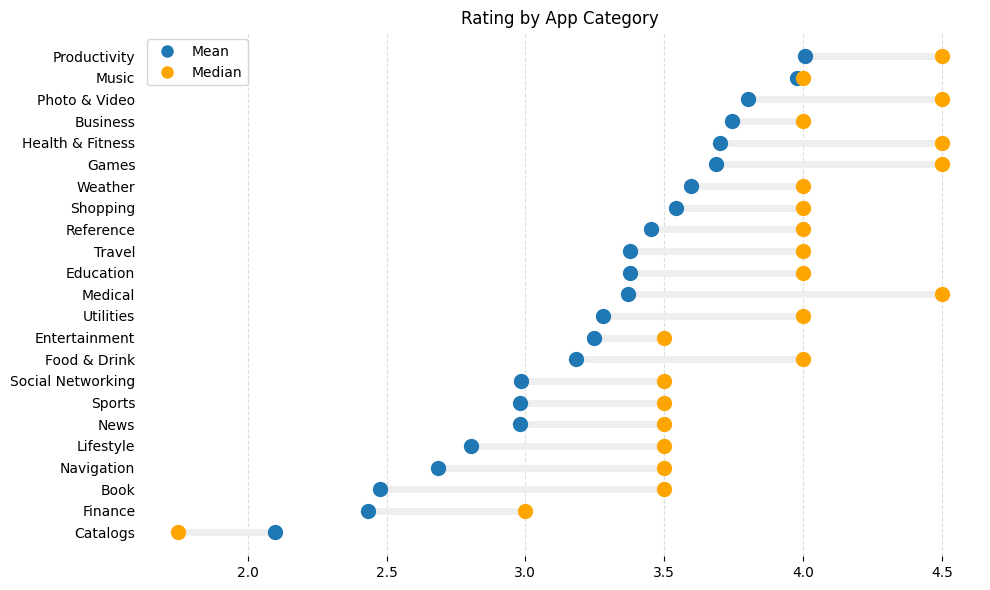

In [ ]:

mean_values = df.groupby('category')['averageRating'].mean()
median_values = df.groupby('category')['averageRating'].median()


dumbbell_data = pd.DataFrame({'mean': mean_values, 'median': median_values})
# dumbbell_data = dumbbell_data.iloc[::-1]
dumbbell_data = dumbbell_data.sort_values(by='mean', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))

# DUMBBELL
for i, row in dumbbell_data.iterrows():
    ax.plot([row['mean'], row['median']], [i, i], color='#eee', lw=5)

    ax.scatter(row['mean'], i, color='#1f77b4', zorder=3, s=100, label = 'Mean' if i == 0 else "")
    ax.scatter(row['median'], i, color='orange', zorder=3, s=100, label='Median' if i == 0 else "")

ax.set_yticks(range(len(dumbbell_data)))
ax.set_yticklabels(dumbbell_data.index)

ax.set_title('Rating by App Category')

ax.grid(axis='x', linestyle='--', zorder=1, color ="#ddd")

ax.tick_params(axis='y', length=0)

# Manually add a legend
mean_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=10, label='Mean')
median_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Median')

# Add the legend manually outside the loop
ax.legend(handles=[mean_patch, median_patch], loc='upper left')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

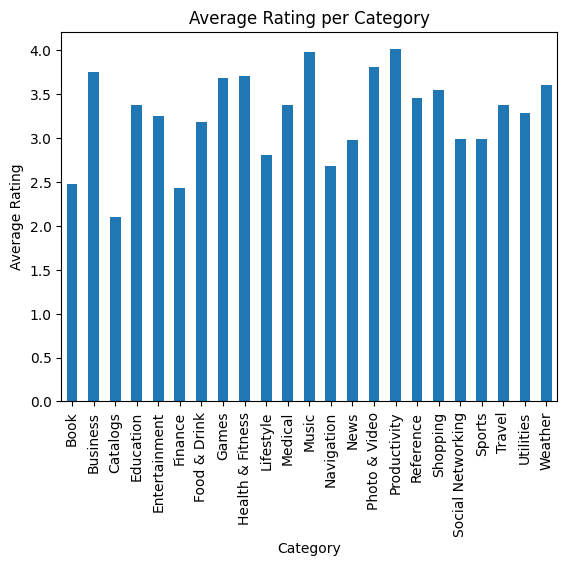

In [ ]:
# Visualize the average ratings per category
avg_rating_by_category.plot(kind='bar')
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
# Create a cross-tabulation of contentRating and category
cross_tab = pd.crosstab(df['contentRating'], df['category'])
print("Cross-tabulation between Content Rating and Category:\n", cross_tab)


Cross-tabulation between Content Rating and Category:
 category       Book  Business  Catalogs  Education  Entertainment  Finance  \
contentRating                                                                
12+              20         1         1          8            108        5   
17+              18         2         2          7             98       24   
4+               63        54         6        432            285       75   
9+               11         0         1          6             44        0   

category       Food & Drink  Games  Health & Fitness  Lifestyle  ...  News  \
contentRating                                                    ...         
12+                      11    741                19         12  ...    29   
17+                       8    177                15         39  ...    23   
4+                       44   2079               141         88  ...    18   
9+                        0    865                 5          5  ...     5   

categor

In [ ]:
df.dtypes

,0
appName,string[python]
price,float64
userRatings,int64
userRatingsCurrent,int64
averageRating,float64
averageRatingCurrent,float64
version,string[python]
contentRating,category
category,category
supportingDevices,int64


In [ ]:
# Categorical analysis (ANOVA for categories)
categories = ['category', 'contentRating']
anova_results = []

In [ ]:
for cat in categories:
    groups = df.groupby(cat)['userRatings'].apply(list)
    f_val, p_val = stats.f_oneway(*groups)
    anova_results.append({
        'variable': cat,
        'f_value': f_val,
        'p_value': p_val
    })

<ipython-input-27-a77ba2b7a37b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(cat)['userRatings'].apply(list)


In [ ]:
anova_df = pd.DataFrame(anova_results)
print("\nANOVA Results for Categorical Variables:")
display(anova_df)


ANOVA Results for Categorical Variables:


,variable,f_value,p_value
0,category,2.675446,0.000035
1,contentRating,2.081947,0.100343


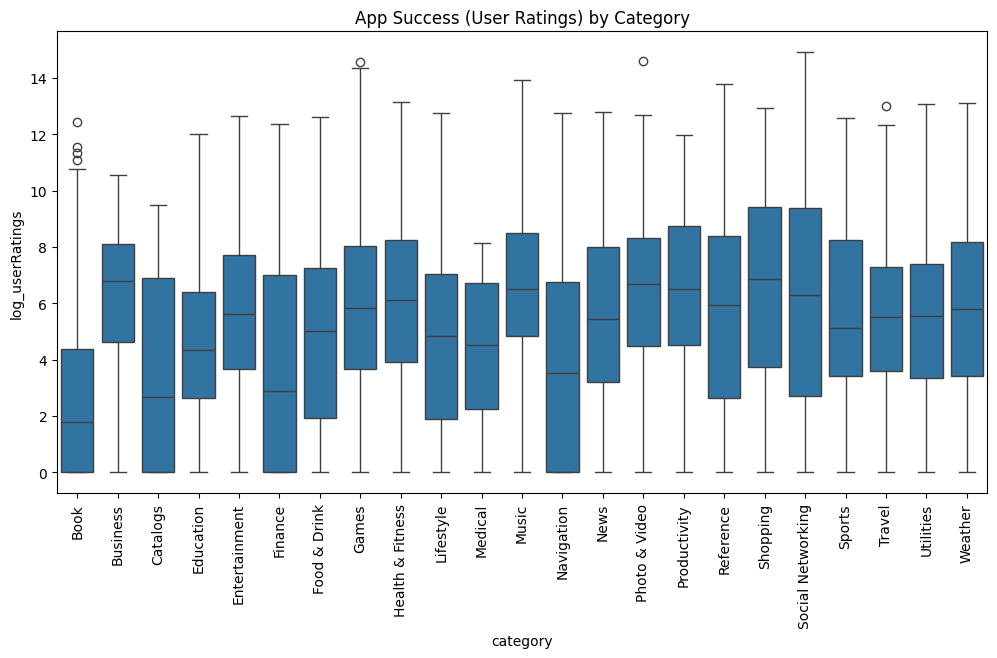

In [ ]:
# Visualize categorical relationships
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='log_userRatings', data=df)
plt.xticks(rotation=90)
plt.title('App Success (User Ratings) by Category')
plt.show()

#Correlation Analysis

In [ ]:
# Encode contentRating (ordinal)
content_rating_map = {'4+': 4, '9+': 9, '12+': 12, '17+': 17}
df['contentRating_num'] = df['contentRating'].map(content_rating_map)

# Encode category (frequency)
df['category_freq'] = df['category'].map(df['category'].value_counts())

In [ ]:
# Convert necessary columns to numeric
numeric_cols = ['price', 'userRatings', 'userRatingsCurrent', 'averageRating', 'averageRatingCurrent', 'supportingDevices', 'supportedLanguages',"category_freq", "contentRating_num"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop non-numeric or categorical columns for correlation
correlation_df = df[numeric_cols]

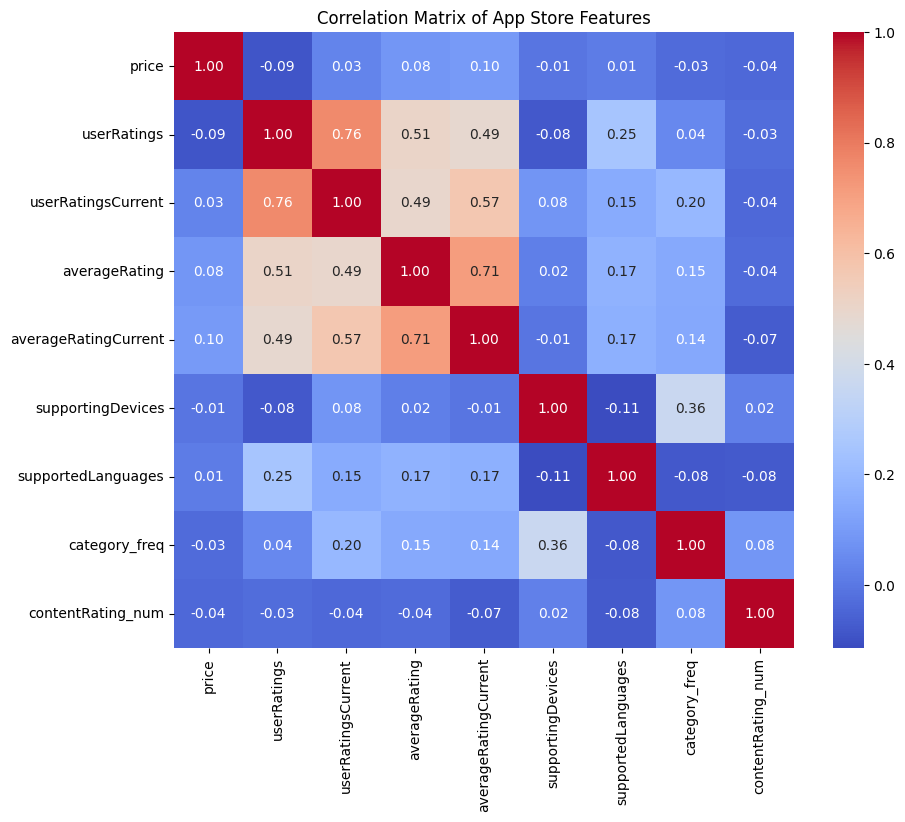

In [ ]:
# Cell 4: Compute correlation matrix
corr_matrix = correlation_df.corr(method="spearman")

# Display as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of App Store Features")
plt.show()

In [ ]:
# Cell 5: Correlation summary with interpretation
def interpret_corr(value):
    if abs(value) < 0.2:
        return "very weak"
    elif abs(value) < 0.4:
        return "weak"
    elif abs(value) < 0.6:
        return "moderate"
    elif abs(value) < 0.8:
        return "strong"
    else:
        return "very strong"

def print_correlation_summary(df_corr, target):
    print(f"\n Spearman Correlation with '{target}':\n")
    corr_series = df_corr[target].drop(target).sort_values(ascending=False)

    for feature, corr in corr_series.items():
        strength = interpret_corr(corr)
        direction = "positive" if corr > 0 else "negative"
        print(f"{feature:25}: {corr:+.2f} → Interpretation: {strength} {direction} correlation with {target}")

print(print_correlation_summary(corr_matrix, 'userRatings'))
print(print_correlation_summary(corr_matrix, 'userRatingsCurrent'))
print(print_correlation_summary(corr_matrix, 'averageRating'))
print(print_correlation_summary(corr_matrix, 'averageRatingCurrent'))
print(print_correlation_summary(corr_matrix, 'supportingDevices'))
print(print_correlation_summary(corr_matrix, 'supportedLanguages'))
print(print_correlation_summary(corr_matrix, 'category_freq'))
print(print_correlation_summary(corr_matrix, 'contentRating_num'))


 Spearman Correlation with 'userRatings':

userRatingsCurrent       : +0.76 → Interpretation: strong positive correlation with userRatings
averageRating            : +0.51 → Interpretation: moderate positive correlation with userRatings
averageRatingCurrent     : +0.49 → Interpretation: moderate positive correlation with userRatings
supportedLanguages       : +0.25 → Interpretation: weak positive correlation with userRatings
category_freq            : +0.04 → Interpretation: very weak positive correlation with userRatings
contentRating_num        : -0.03 → Interpretation: very weak negative correlation with userRatings
supportingDevices        : -0.08 → Interpretation: very weak negative correlation with userRatings
price                    : -0.09 → Interpretation: very weak negative correlation with userRatings
None

 Spearman Correlation with 'userRatingsCurrent':

userRatings              : +0.76 → Interpretation: strong positive correlation with userRatingsCurrent
averageRatingCu

In [ ]:
# Calculate correlations
numeric_cols = ['price', 'averageRating', 'averageRatingCurrent',
                'supportingDevices', 'supportedLanguages']
correlation_results = []

In [ ]:
for col in numeric_cols:
    pearson_r, pearson_p = stats.pearsonr(df[col], df['userRatings'])
    spearman_r, spearman_p = stats.spearmanr(df[col], df['userRatings'])
    correlation_results.append({
        'variable': col,
        'pearson_r': pearson_r,
        'pearson_p': pearson_p,
        'spearman_r': spearman_r,
        'spearman_p': spearman_p
    })

corr_df = pd.DataFrame(correlation_results)

In [ ]:
# Display correlation results
print("Correlation with User Ratings (Success Metric):")
display(corr_df)

Correlation with User Ratings (Success Metric):


,variable,pearson_r,pearson_p,spearman_r,spearman_p
0,price,-0.039044,9.229857e-04,-0.087833,8.362755e-14
1,averageRating,0.083310,1.455213e-12,0.507648,0.000000e+00
2,averageRatingCurrent,0.088744,4.622967e-14,0.486164,0.000000e+00
3,supportingDevices,0.008832,4.537512e-01,-0.081478,4.436069e-12
4,supportedLanguages,0.137675,8.579822e-32,0.250726,1.362253e-103


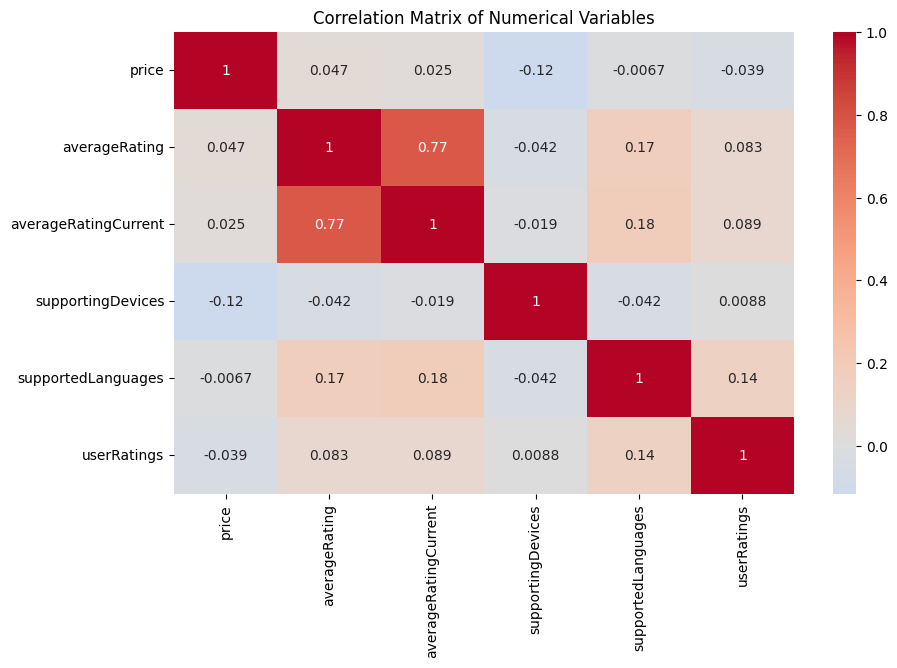

In [ ]:
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols + ['userRatings']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

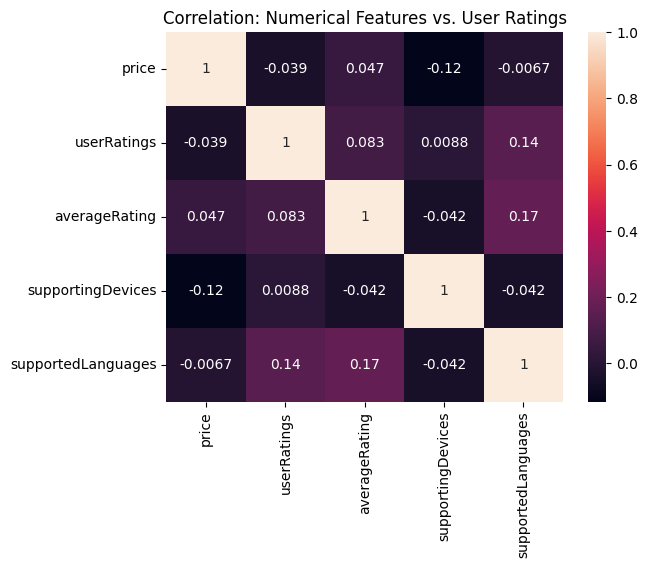

In [ ]:
# Numerical correlation
numerical_cols = ['price', 'userRatings', 'averageRating', 'supportingDevices', 'supportedLanguages']
corr_matrix = df[numerical_cols].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation: Numerical Features vs. User Ratings")
plt.show()

<ipython-input-39-37204d5bfd07>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_user_ratings_by_category = df.groupby('category')['userRatings'].mean()
<ipython-input-39-37204d5bfd07>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['userRatings'].mean().sort_values(ascending=False).plot(kind='bar')


Average User Ratings by Category:
category
Book                  5125.0
Business              4788.0
Catalogs              1732.0
Education             2239.0
Entertainment         7534.0
Finance              11048.0
Food & Drink         13939.0
Games                13692.0
Health & Fitness      9913.0
Lifestyle             6162.0
Medical                593.0
Music                28842.0
Navigation           11854.0
News                 13015.0
Photo & Video        14352.0
Productivity          8051.0
Reference            22411.0
Shopping             18615.0
Social Networking    45499.0
Sports               14027.0
Travel               14129.0
Utilities             6864.0
Weather              22181.0
Name: userRatings, dtype: float64


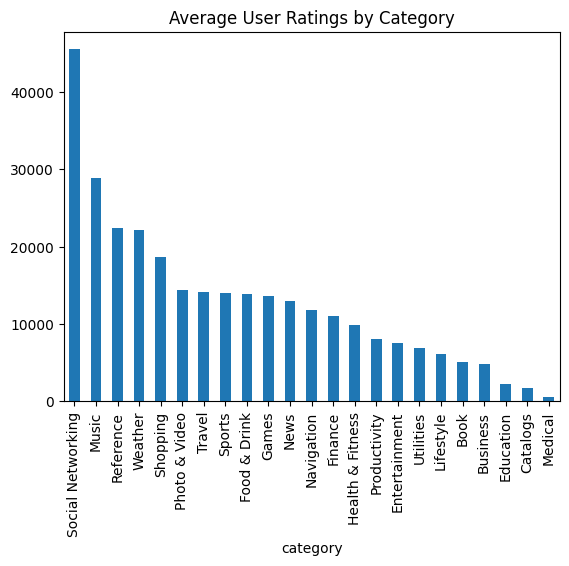

In [ ]:
# Categorical analysis (e.g., category)
avg_user_ratings_by_category = df.groupby('category')['userRatings'].mean()
print("Average User Ratings by Category:")
print(round(avg_user_ratings_by_category, 0))
df.groupby('category')['userRatings'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average User Ratings by Category")
plt.show()

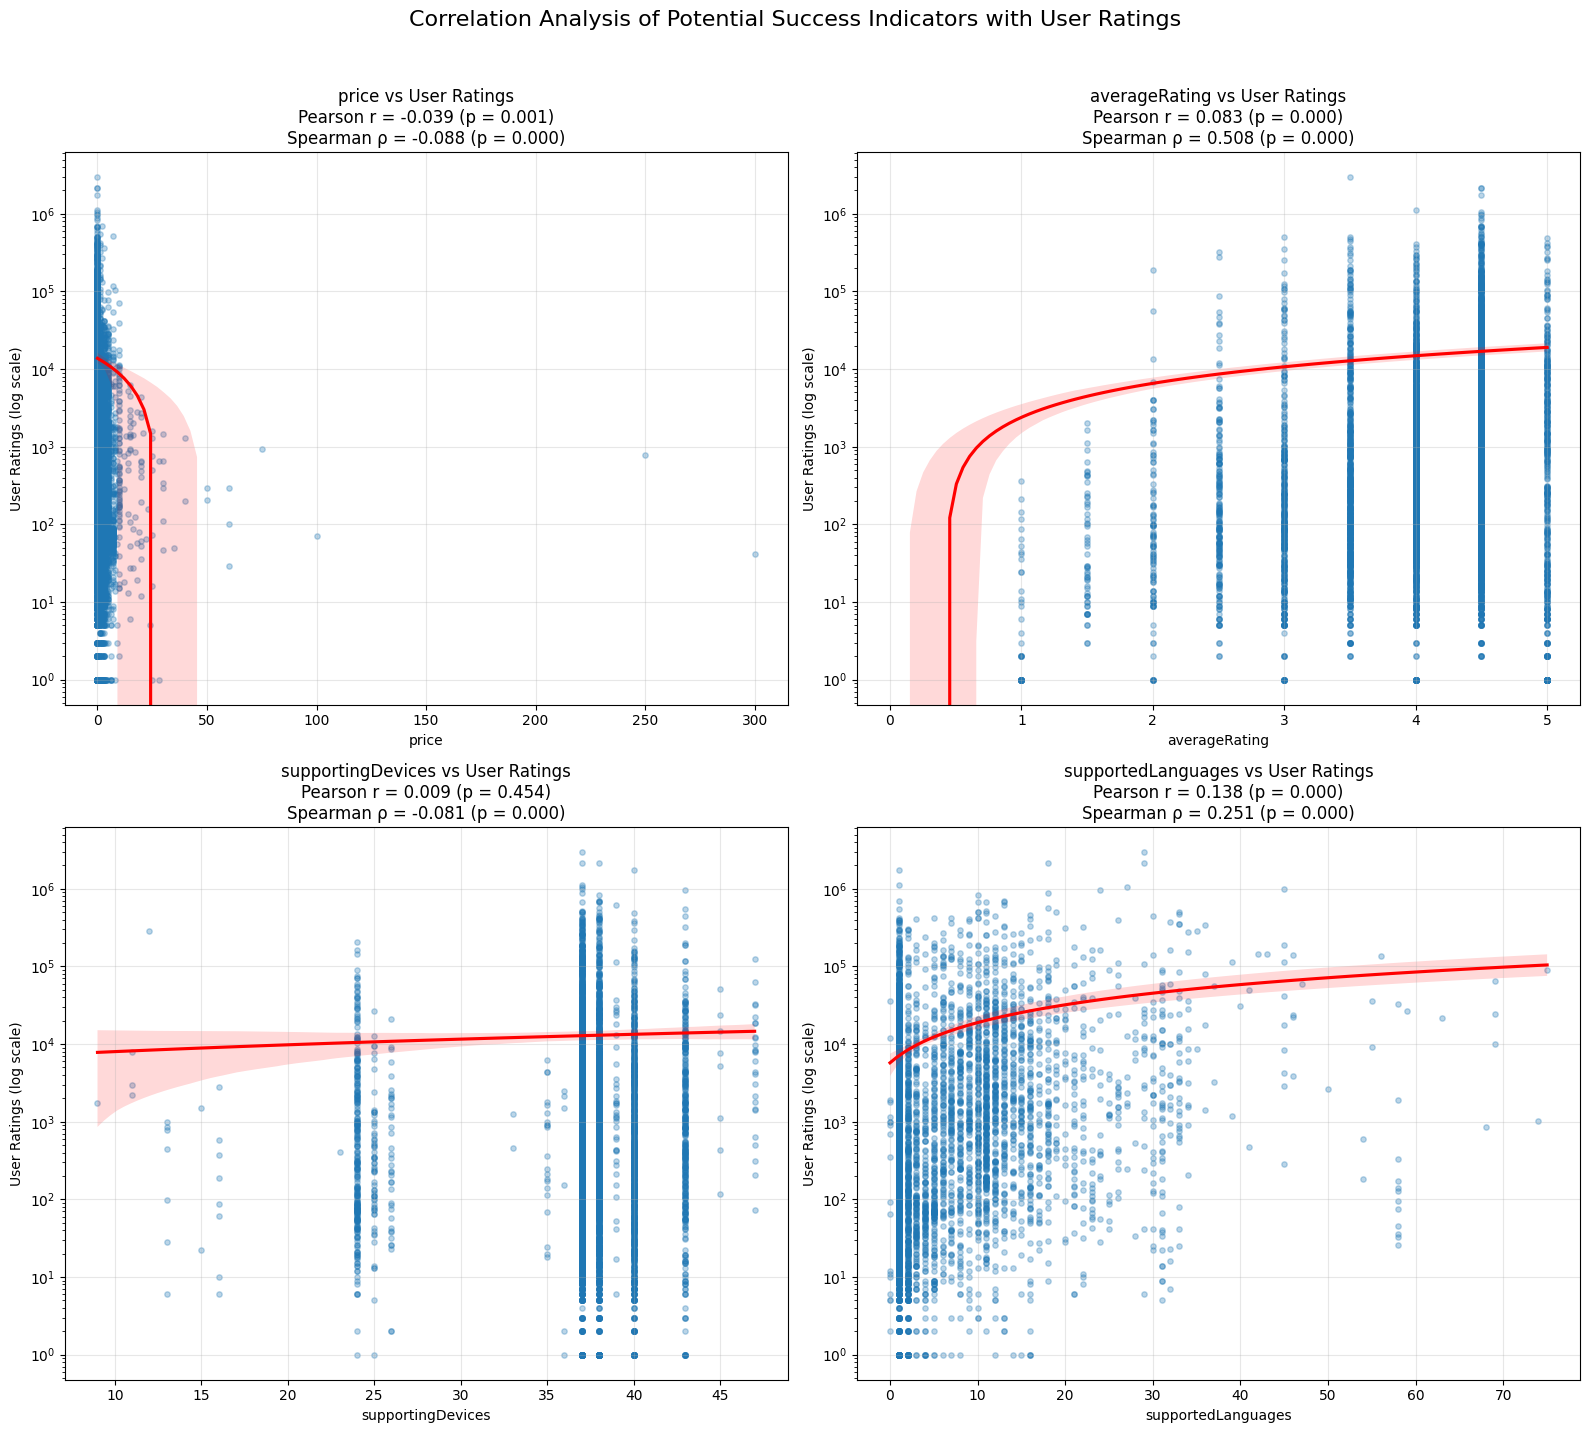


Correlation Summary:

Variable: price
Pearson correlation (linear): r = -0.0390, p-value = 9.2299e-04
Spearman correlation (rank-based): ρ = -0.0878, p-value = 8.3628e-14
Interpretation: weak negative correlation with user ratings

Variable: averageRating
Pearson correlation (linear): r = 0.0833, p-value = 1.4552e-12
Spearman correlation (rank-based): ρ = 0.5076, p-value = 0.0000e+00
Interpretation: weak positive correlation with user ratings

Variable: supportingDevices
Pearson correlation (linear): r = 0.0088, p-value = 4.5375e-01
Spearman correlation (rank-based): ρ = -0.0815, p-value = 4.4361e-12
Interpretation: weak positive correlation with user ratings

Variable: supportedLanguages
Pearson correlation (linear): r = 0.1377, p-value = 8.5798e-32
Spearman correlation (rank-based): ρ = 0.2507, p-value = 1.3623e-103
Interpretation: weak positive correlation with user ratings


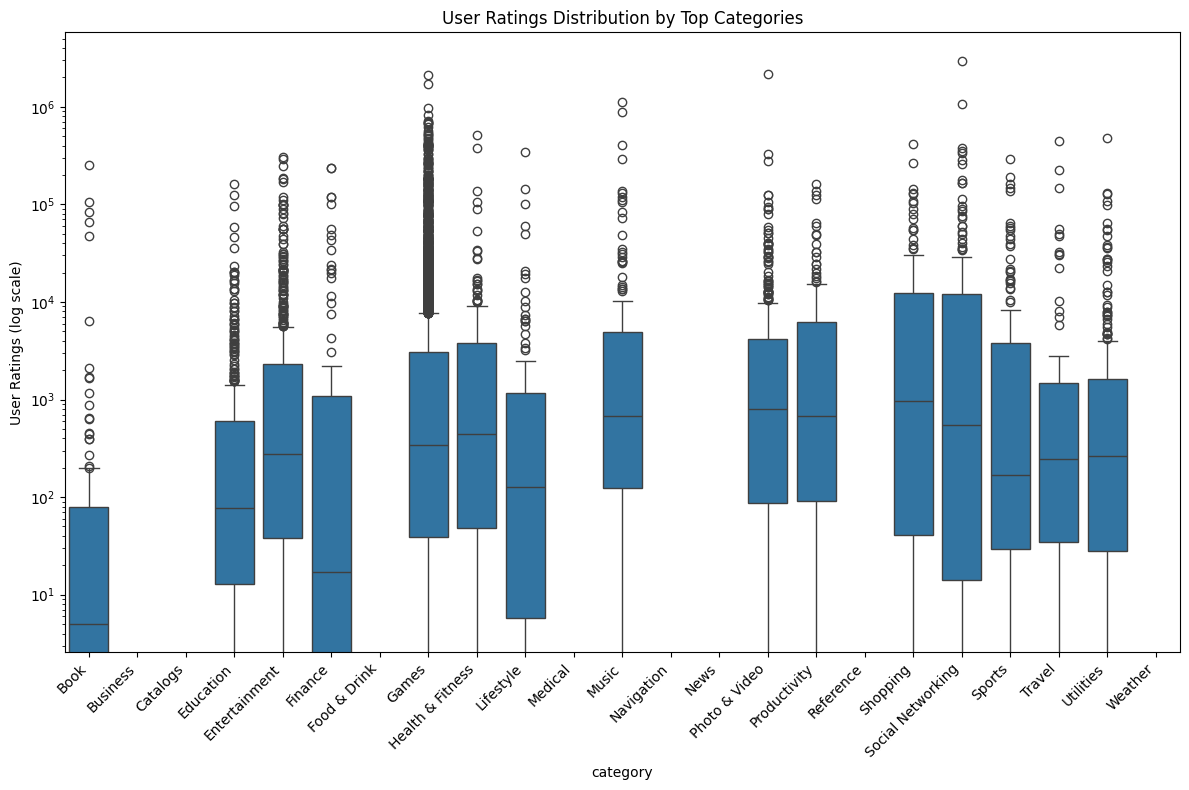

In [ ]:
# Ensure numeric columns are properly typed
numeric_cols = ['price', 'userRatings', 'userRatingsCurrent',
                'averageRating', 'averageRatingCurrent',
                'supportingDevices', 'supportedLanguages']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# We'll use userRatings as our success metric
# Let's explore correlations with several potential success indicators
variables_to_test = ['price', 'averageRating', 'supportingDevices', 'supportedLanguages']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()  # Flatten the axes array for easier iteration

# Dictionary to store correlation results
correlation_results = {}

for i, var in enumerate(variables_to_test):
    # Create clean dataset for this pair
    clean_df = df[['userRatings', var]].dropna()

    # Calculate correlations
    pearson_r, pearson_p = pearsonr(clean_df[var], clean_df['userRatings'])
    spearman_r, spearman_p = spearmanr(clean_df[var], clean_df['userRatings'])

    # Store results
    correlation_results[var] = {
        'pearson_r': pearson_r,
        'pearson_p': pearson_p,
        'spearman_r': spearman_r,
        'spearman_p': spearman_p
    }

    # Create scatter plot
    sns.regplot(x=var, y='userRatings', data=clean_df,
                scatter_kws={'alpha': 0.3, 's': 15},
                line_kws={'color': 'red'},
                ax=axes[i])

    # Add log scale if needed (ratings vary widely)
    axes[i].set_yscale('log')

    # Format title with correlation info
    title = (f'{var} vs User Ratings\n'
             f'Pearson r = {pearson_r:.3f} (p = {pearson_p:.3f})\n'
             f'Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3f})')
    axes[i].set_title(title, fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('User Ratings (log scale)')
    axes[i].grid(alpha=0.3)

# Add overall title
plt.suptitle('Correlation Analysis of Potential Success Indicators with User Ratings',
             fontsize=16, y=1.02)
plt.tight_layout()

# Save and show
plt.savefig('app_store_success_correlation_analysis.png', bbox_inches='tight')
plt.show()

# Print correlation summary
print("\nCorrelation Summary:")
print("=" * 50)
for var, results in correlation_results.items():
    print(f"\nVariable: {var}")
    print(f"Pearson correlation (linear): r = {results['pearson_r']:.4f}, p-value = {results['pearson_p']:.4e}")
    print(f"Spearman correlation (rank-based): ρ = {results['spearman_r']:.4f}, p-value = {results['spearman_p']:.4e}")

    # Interpretation
    strength = ('very strong' if abs(results['pearson_r']) > 0.5
                else 'moderate' if abs(results['pearson_r']) > 0.3
                else 'weak')
    direction = 'positive' if results['pearson_r'] > 0 else 'negative'

    print(f"Interpretation: {strength} {direction} correlation with user ratings")

# Additional analysis: Category impact
if 'category' in df.columns:
    plt.figure(figsize=(12, 8))
    top_categories = df['category'].value_counts().nlargest(15).index
    sns.boxplot(data=df[df['category'].isin(top_categories)],
               x='category', y='userRatings')
    plt.xticks(rotation=45, ha='right')
    plt.title('User Ratings Distribution by Top Categories')
    plt.yscale('log')
    plt.ylabel('User Ratings (log scale)')
    plt.tight_layout()
    plt.savefig('ratings_by_category.png')
    plt.show()

In [ ]:
df['price'].value_counts()

,count
price,
0.00,4056
0.99,728
2.99,683
1.99,621
4.99,394
3.99,277
6.99,166
9.99,81
5.99,52


In [ ]:
df['price'].describe()

,price
count,7197.000000
mean,1.726218
std,5.833006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.990000
max,299.990000


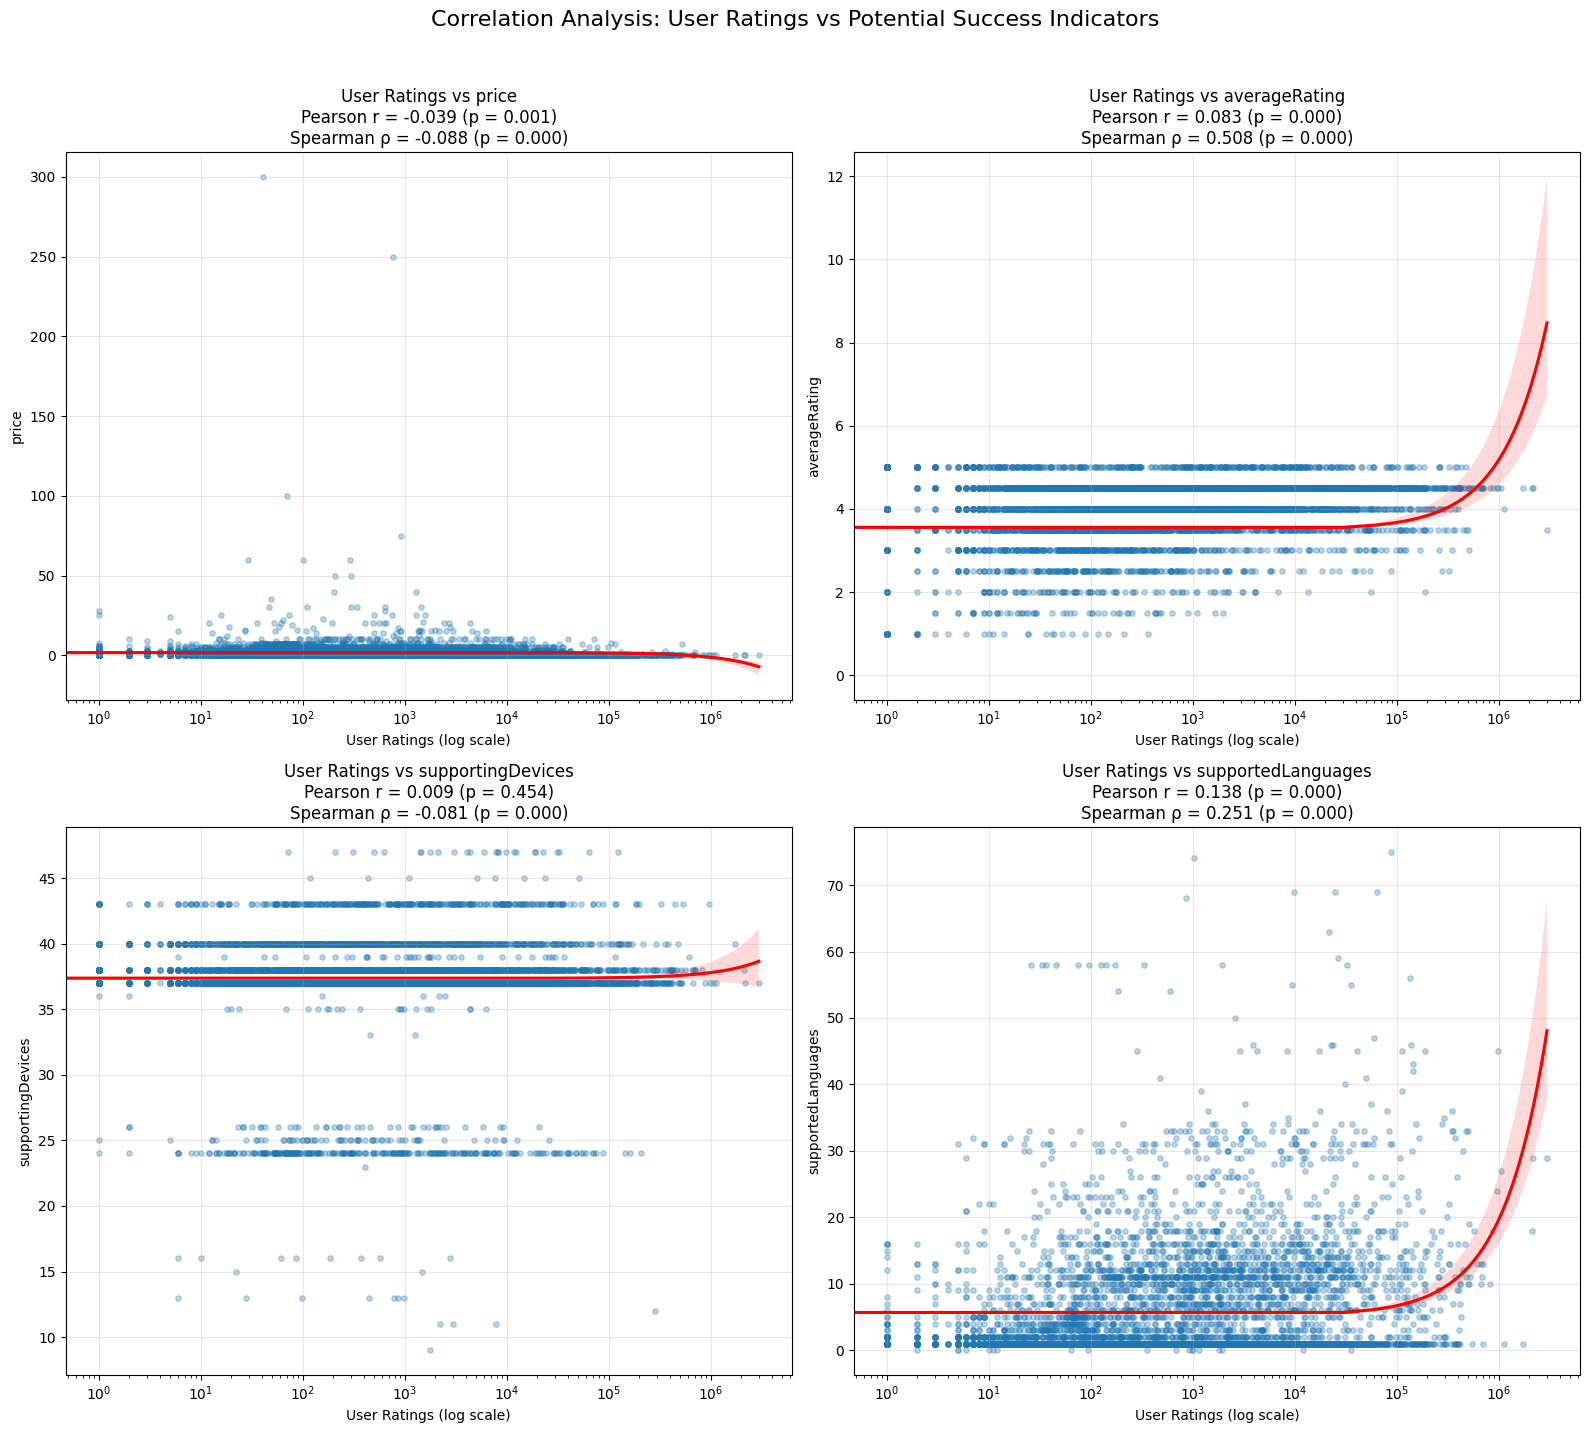


Correlation Summary:

Variable: price
Pearson correlation (linear): r = -0.0390, p-value = 9.2299e-04
Spearman correlation (rank-based): ρ = -0.0878, p-value = 8.3628e-14
Interpretation: weak negative correlation with price

Variable: averageRating
Pearson correlation (linear): r = 0.0833, p-value = 1.4552e-12
Spearman correlation (rank-based): ρ = 0.5076, p-value = 0.0000e+00
Interpretation: weak positive correlation with averageRating

Variable: supportingDevices
Pearson correlation (linear): r = 0.0088, p-value = 4.5375e-01
Spearman correlation (rank-based): ρ = -0.0815, p-value = 4.4361e-12
Interpretation: weak positive correlation with supportingDevices

Variable: supportedLanguages
Pearson correlation (linear): r = 0.1377, p-value = 8.5798e-32
Spearman correlation (rank-based): ρ = 0.2507, p-value = 1.3623e-103
Interpretation: weak positive correlation with supportedLanguages


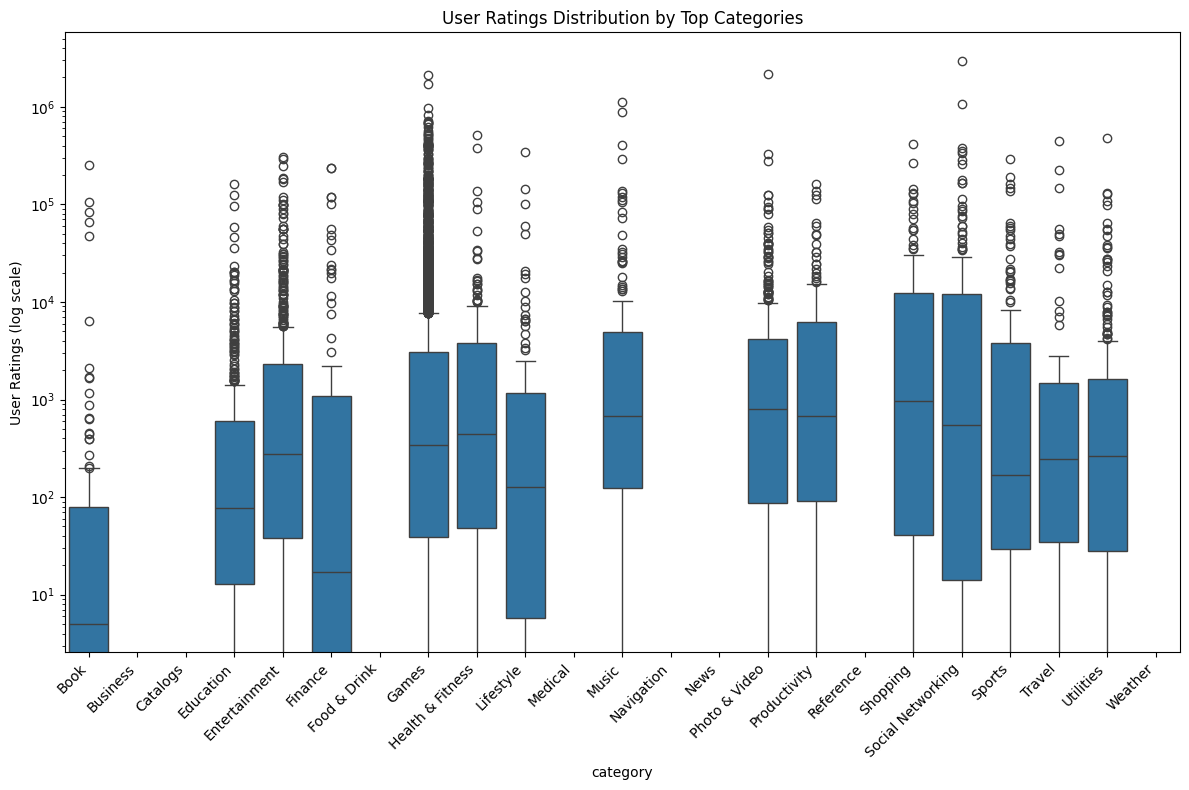

In [ ]:
# Ensure numeric columns are properly typed
numeric_cols = ['price', 'userRatings', 'userRatingsCurrent',
                'averageRating', 'averageRatingCurrent',
                'supportingDevices', 'supportedLanguages']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# We'll use userRatings as our independent variable (x-axis now)
# Let's explore correlations with several potential success indicators
variables_to_test = ['price', 'averageRating', 'supportingDevices', 'supportedLanguages']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()  # Flatten the axes array for easier iteration

# Dictionary to store correlation results
correlation_results = {}

for i, var in enumerate(variables_to_test):
    # Create clean dataset for this pair
    clean_df = df[['userRatings', var]].dropna()

    # Calculate correlations
    pearson_r, pearson_p = pearsonr(clean_df['userRatings'], clean_df[var])
    spearman_r, spearman_p = spearmanr(clean_df['userRatings'], clean_df[var])

    # Store results
    correlation_results[var] = {
        'pearson_r': pearson_r,
        'pearson_p': pearson_p,
        'spearman_r': spearman_r,
        'spearman_p': spearman_p
    }

    # Create scatter plot with userRatings on the x-axis
    sns.regplot(x='userRatings', y=var, data=clean_df,
                scatter_kws={'alpha': 0.3, 's': 15},
                line_kws={'color': 'red'},
                ax=axes[i])

    # Apply log scale to x-axis (userRatings)
    axes[i].set_xscale('log')

    # Format title with correlation info
    title = (f'User Ratings vs {var}\n'
             f'Pearson r = {pearson_r:.3f} (p = {pearson_p:.3f})\n'
             f'Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3f})')
    axes[i].set_title(title, fontsize=12)
    axes[i].set_xlabel('User Ratings (log scale)')
    axes[i].set_ylabel(var)
    axes[i].grid(alpha=0.3)

# Add overall title
plt.suptitle('Correlation Analysis: User Ratings vs Potential Success Indicators',
             fontsize=16, y=1.02)
plt.tight_layout()

# Save and show
plt.savefig('user_ratings_vs_indicators_correlation_analysis.png', bbox_inches='tight')
plt.show()

# Print correlation summary
print("\nCorrelation Summary:")
print("=" * 50)
for var, results in correlation_results.items():
    print(f"\nVariable: {var}")
    print(f"Pearson correlation (linear): r = {results['pearson_r']:.4f}, p-value = {results['pearson_p']:.4e}")
    print(f"Spearman correlation (rank-based): ρ = {results['spearman_r']:.4f}, p-value = {results['spearman_p']:.4e}")

    # Interpretation
    strength = ('very strong' if abs(results['pearson_r']) > 0.5
                else 'moderate' if abs(results['pearson_r']) > 0.3
                else 'weak')
    direction = 'positive' if results['pearson_r'] > 0 else 'negative'

    print(f"Interpretation: {strength} {direction} correlation with {var}")

# Additional analysis: Category impact (remains unchanged)
if 'category' in df.columns:
    plt.figure(figsize=(12, 8))
    top_categories = df['category'].value_counts().nlargest(15).index
    sns.boxplot(data=df[df['category'].isin(top_categories)],
                x='category', y='userRatings')
    plt.xticks(rotation=45, ha='right')
    plt.title('User Ratings Distribution by Top Categories')
    plt.yscale('log')
    plt.ylabel('User Ratings (log scale)')
    plt.tight_layout()
    plt.savefig('ratings_by_category.png')
    plt.show()


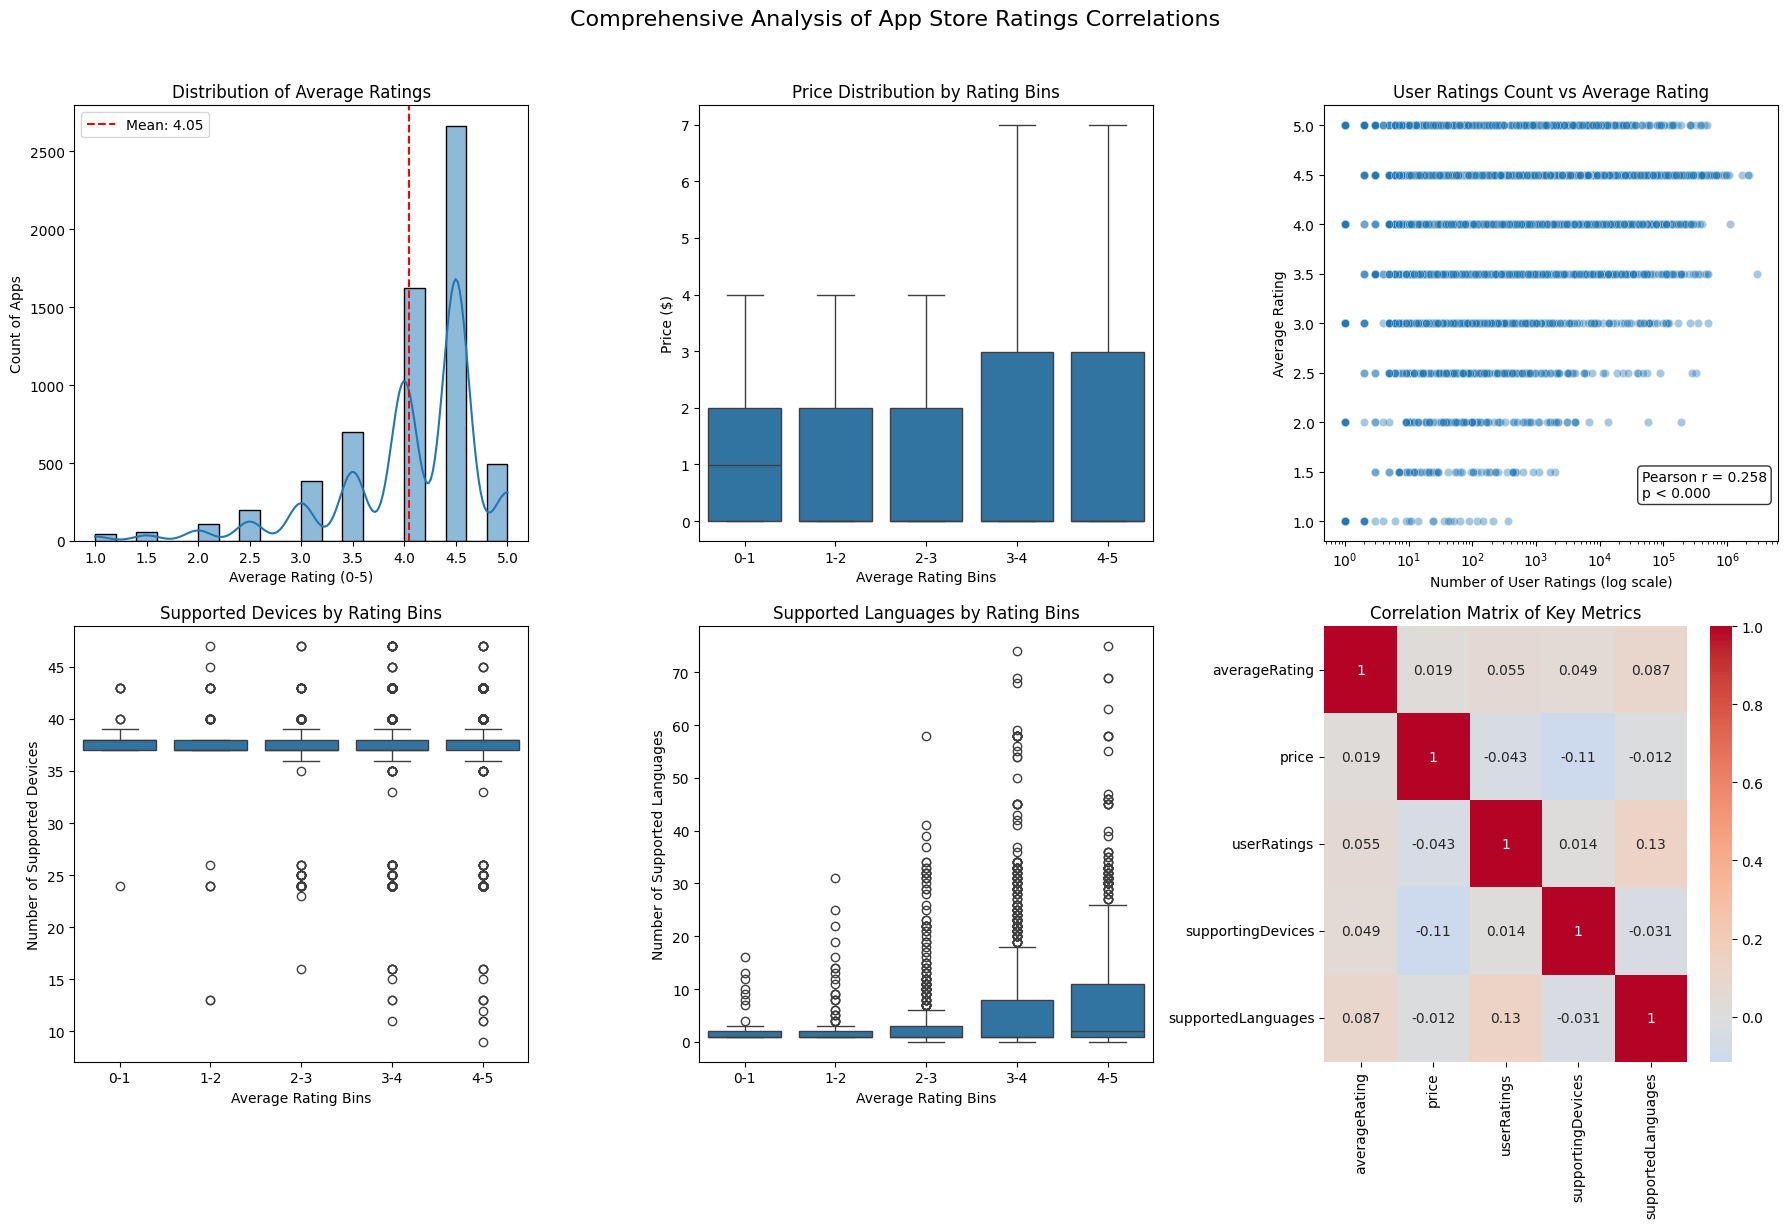


=== Detailed Correlation Report ===
Pearson Correlation Coefficients (r):
- A measure of linear correlation between two variables
- Range: -1 (perfect negative) to +1 (perfect positive)

Key Findings:
1. Average Rating vs Price: 0.019
   - Interpretation: Positive but weak relationship
2. Average Rating vs User Ratings: 0.055
   - Interpretation: Positive correlation between rating count and quality
3. Supported Devices vs Rating: 0.049
   - Interpretation: More supported devices correlates with higher ratings


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from matplotlib.ticker import MaxNLocator

# Ensure numeric columns are properly formatted
numeric_cols = ['price', 'userRatings', 'userRatingsCurrent',
                'averageRating', 'averageRatingCurrent',
                'supportingDevices', 'supportedLanguages']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create rating bins for categorical analysis
df['rating_bin'] = pd.cut(df['averageRating'],
                         bins=[0, 1, 2, 3, 4, 5],
                         labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

# Create a clean dataset by dropping rows with missing values in our key columns
clean_df = df[['price', 'userRatings', 'averageRating',
               'supportingDevices', 'supportedLanguages', 'rating_bin']].dropna()

# Set up the figure
plt.figure(figsize=(18, 12))
plt.suptitle('Comprehensive Analysis of App Store Ratings Correlations', fontsize=16, y=1.02)

# Plot 1: Distribution of Average Ratings
plt.subplot(2, 3, 1)
sns.histplot(clean_df['averageRating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating (0-5)')
plt.ylabel('Count of Apps')
plt.axvline(clean_df['averageRating'].mean(), color='red', linestyle='--',
            label=f'Mean: {clean_df["averageRating"].mean():.2f}')
plt.legend()

# Plot 2: Price vs Rating
plt.subplot(2, 3, 2)
sns.boxplot(x='rating_bin', y='price', data=clean_df, showfliers=False)
plt.title('Price Distribution by Rating Bins')
plt.xlabel('Average Rating Bins')
plt.ylabel('Price ($)')

# Plot 3: User Ratings vs Average Rating
plt.subplot(2, 3, 3)
sns.scatterplot(x='userRatings', y='averageRating', data=clean_df, alpha=0.4)
plt.title('User Ratings Count vs Average Rating')
plt.xlabel('Number of User Ratings (log scale)')
plt.ylabel('Average Rating')
plt.xscale('log')  # Log scale due to wide distribution

# Calculate and annotate correlations
pearson_r, p_value = pearsonr(np.log10(clean_df['userRatings']+1), clean_df['averageRating'])
plt.annotate(f'Pearson r = {pearson_r:.3f}\np < {p_value:.3f}',
             xy=(0.7, 0.1), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 4: Supporting Devices vs Rating
plt.subplot(2, 3, 4)
sns.boxplot(x='rating_bin', y='supportingDevices', data=clean_df)
plt.title('Supported Devices by Rating Bins')
plt.xlabel('Average Rating Bins')
plt.ylabel('Number of Supported Devices')

# Plot 5: Supported Languages vs Rating
plt.subplot(2, 3, 5)
sns.boxplot(x='rating_bin', y='supportedLanguages', data=clean_df)
plt.title('Supported Languages by Rating Bins')
plt.xlabel('Average Rating Bins')
plt.ylabel('Number of Supported Languages')

# Plot 6: Correlation Heatmap
plt.subplot(2, 3, 6)
corr_matrix = clean_df[['averageRating', 'price', 'userRatings',
                       'supportingDevices', 'supportedLanguages']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')

plt.tight_layout()
plt.savefig('app_rating_comprehensive_analysis.png', bbox_inches='tight')
plt.show()

# Print detailed correlation report
print("\n=== Detailed Correlation Report ===")
print("Pearson Correlation Coefficients (r):")
print("- A measure of linear correlation between two variables")
print("- Range: -1 (perfect negative) to +1 (perfect positive)")

print("\nKey Findings:")
print(f"1. Average Rating vs Price: {corr_matrix.loc['averageRating', 'price']:.3f}")
print(f"   - Interpretation: {'Positive' if corr_matrix.loc['averageRating', 'price'] > 0 else 'Negative'} but {'strong' if abs(corr_matrix.loc['averageRating', 'price']) > 0.3 else 'weak'} relationship")
print(f"2. Average Rating vs User Ratings: {corr_matrix.loc['averageRating', 'userRatings']:.3f}")
print(f"   - Interpretation: {'Positive' if corr_matrix.loc['averageRating', 'userRatings'] > 0 else 'Negative'} correlation between rating count and quality")
print(f"3. Supported Devices vs Rating: {corr_matrix.loc['averageRating', 'supportingDevices']:.3f}")
print(f"   - Interpretation: {'More' if corr_matrix.loc['averageRating', 'supportingDevices'] > 0 else 'Fewer'} supported devices correlates with {'higher' if corr_matrix.loc['averageRating', 'supportingDevices'] > 0 else 'lower'} ratings")

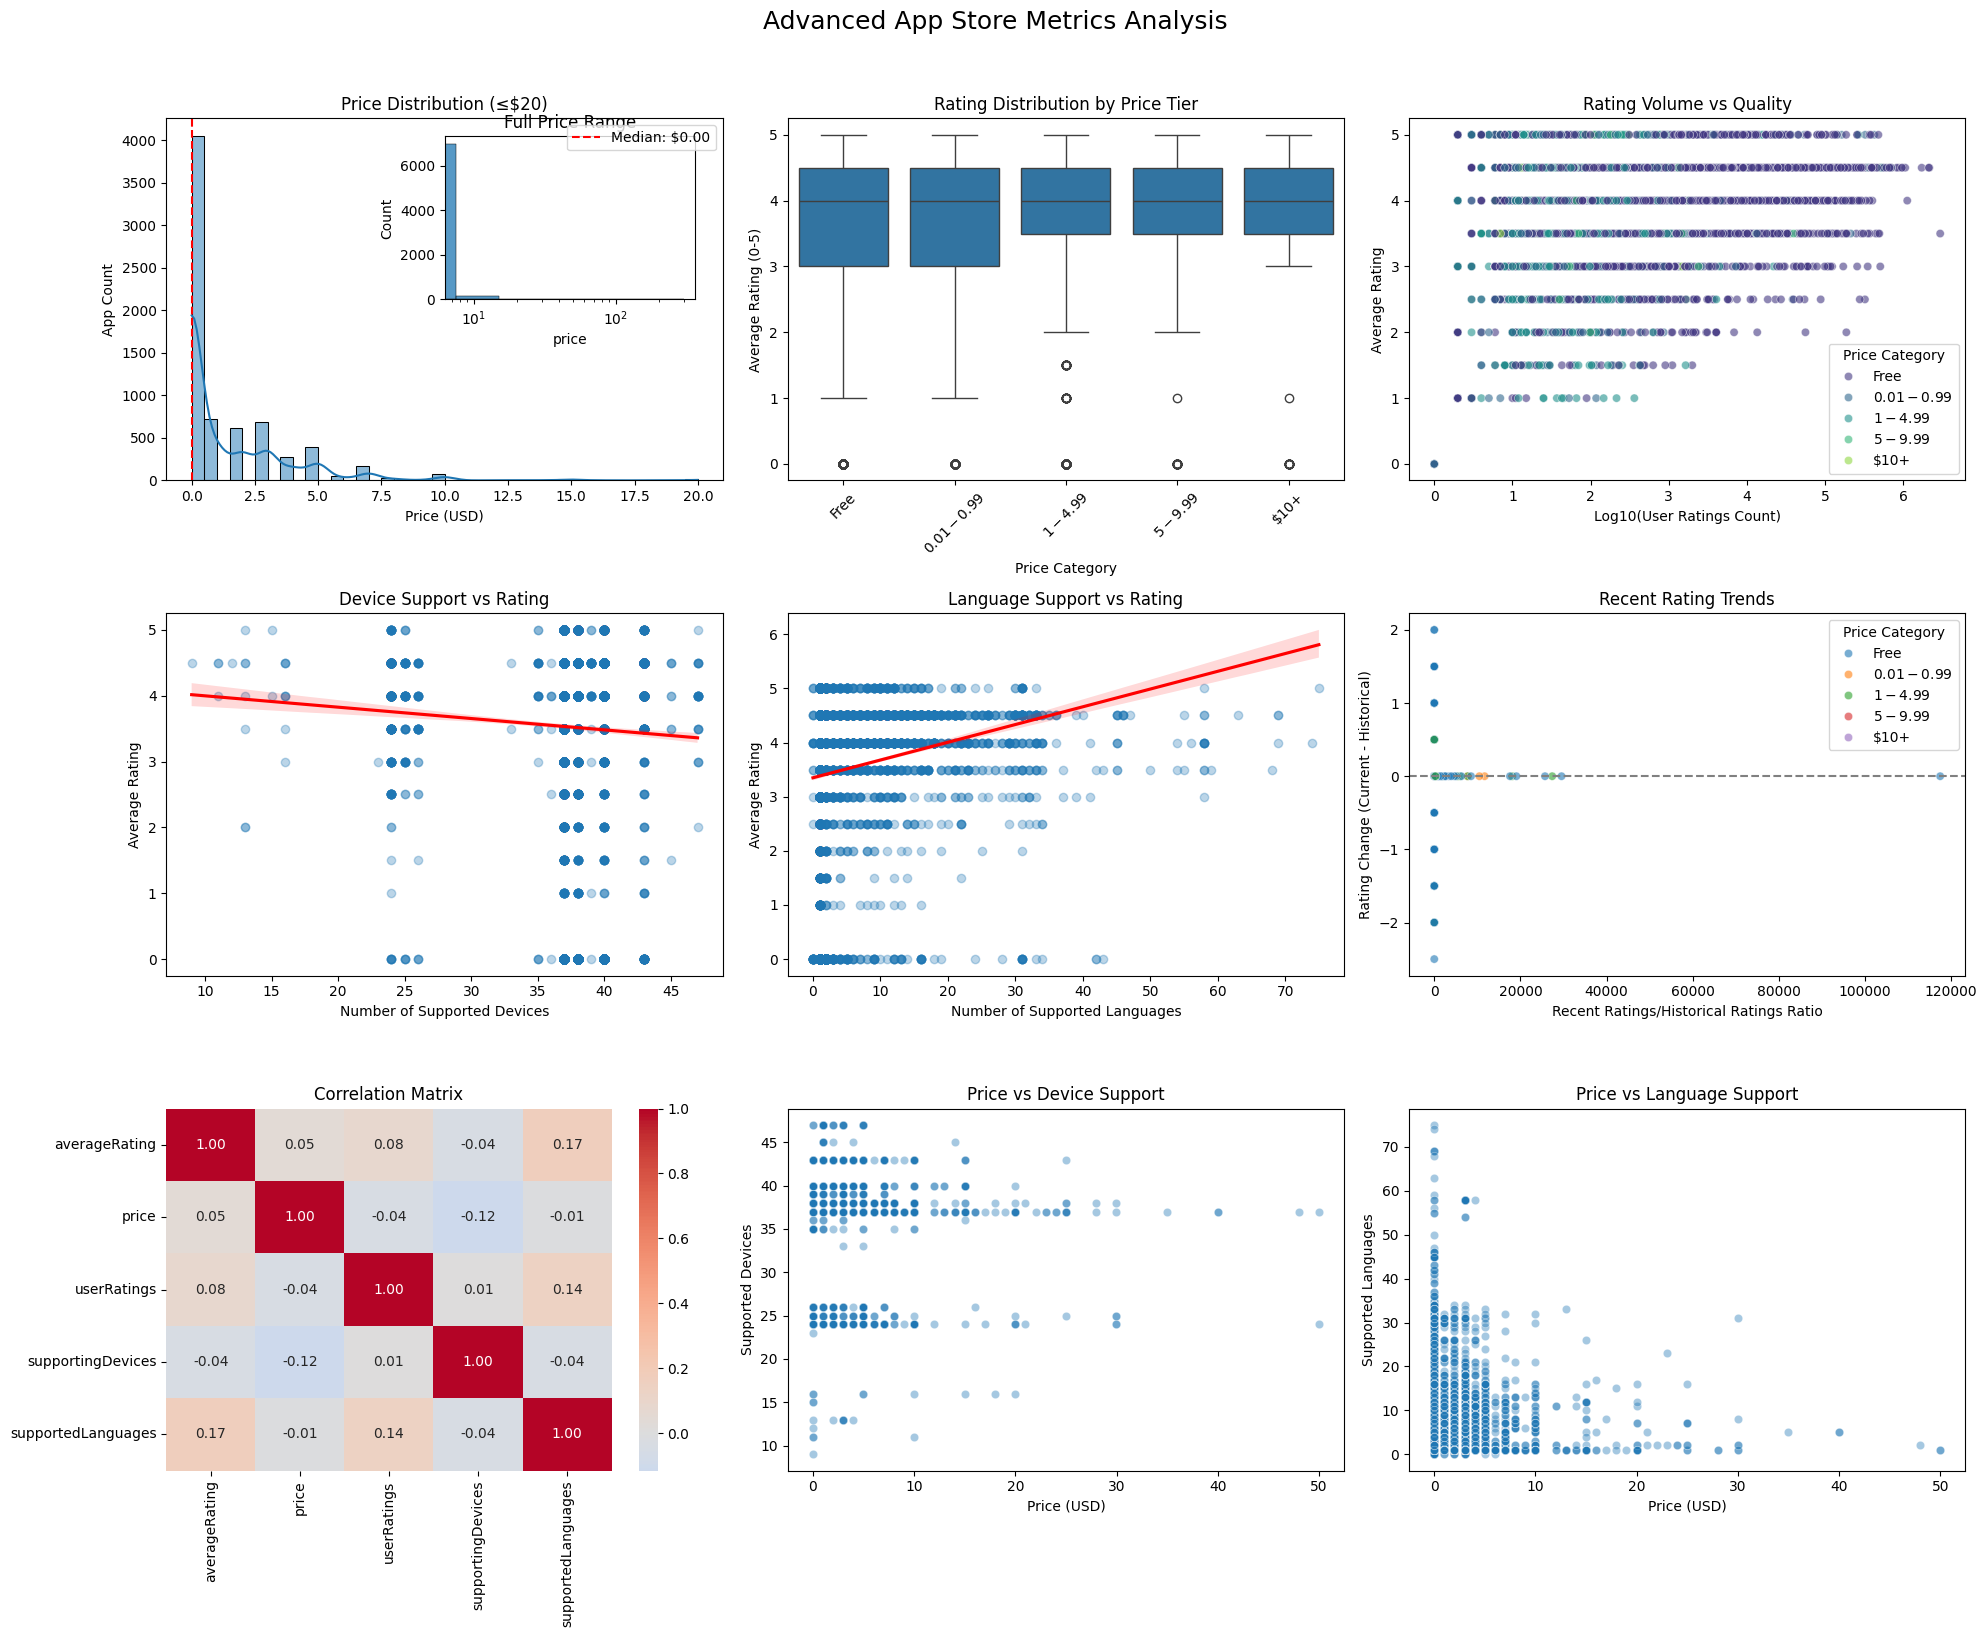


=== Statistical Insights Report ===
1. Pricing Distribution:
- 56.4% of apps are free
- Median price for paid apps: $2.99

2. Rating Analysis:
- Global average rating: 3.53/5
- Free apps average: 3.38
- Paid apps average: 3.72

3. Support Metrics:
- Median supported devices: 37.0
- Median supported languages: 1.0
- Correlation between devices and languages: -0.04

4. Rating Trends:
- Apps with improving ratings: 380
- Apps with declining ratings: 939


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from matplotlib.ticker import FuncFormatter

numeric_cols = ['price', 'userRatings', 'userRatingsCurrent',
               'averageRating', 'averageRatingCurrent',
               'supportingDevices', 'supportedLanguages']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create derived metrics
df['rating_volume_change'] = df['userRatingsCurrent'] / (df['userRatings'] - df['userRatingsCurrent'] + 1)
df['rating_change'] = df['averageRatingCurrent'] - df['averageRating']
df['price_category'] = pd.cut(df['price'],
                             bins=[-0.1, 0, 0.99, 4.99, 9.99, float('inf')],
                             labels=['Free', '$0.01-$0.99', '$1-$4.99', '$5-$9.99', '$10+'])

# Create visualization grid
plt.figure(figsize=(20, 16))
plt.suptitle('Advanced App Store Metrics Analysis', fontsize=18, y=1.02)

# 1. Price Distribution Analysis
ax1 = plt.subplot(3, 3, 1)
price_plot = sns.histplot(df[df['price'] <= 20]['price'], bins=40, kde=True)
plt.title('Price Distribution (≤$20)')
plt.xlabel('Price (USD)')
plt.ylabel('App Count')
plt.axvline(df['price'].median(), color='red', linestyle='--',
            label=f'Median: ${df["price"].median():.2f}')
plt.legend()

# Add inset for full price range
inset = ax1.inset_axes([0.5, 0.5, 0.45, 0.45])
sns.histplot(df['price'], bins=40, ax=inset)
inset.set_title('Full Price Range')
inset.set_xscale('log')

# 2. Rating Distribution by Price Category
plt.subplot(3, 3, 2)
sns.boxplot(x='price_category', y='averageRating', data=df,
            order=['Free', '$0.01-$0.99', '$1-$4.99', '$5-$9.99', '$10+'])
plt.title('Rating Distribution by Price Tier')
plt.xlabel('Price Category')
plt.ylabel('Average Rating (0-5)')
plt.xticks(rotation=45)

# 3. Rating Volume vs Rating Quality
plt.subplot(3, 3, 3)
sns.scatterplot(x=np.log10(df['userRatings']+1),
                y='averageRating',
                hue='price_category',
                data=df, alpha=0.6, palette='viridis')
plt.title('Rating Volume vs Quality')
plt.xlabel('Log10(User Ratings Count)')
plt.ylabel('Average Rating')
plt.legend(title='Price Category')

# 4. Device Support Analysis
plt.subplot(3, 3, 4)
sns.regplot(x='supportingDevices', y='averageRating',
           data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Device Support vs Rating')
plt.xlabel('Number of Supported Devices')
plt.ylabel('Average Rating')

# 5. Language Support Analysis
plt.subplot(3, 3, 5)
sns.regplot(x='supportedLanguages', y='averageRating',
           data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Language Support vs Rating')
plt.xlabel('Number of Supported Languages')
plt.ylabel('Average Rating')

# 6. Rating Trends Analysis
plt.subplot(3, 3, 6)
rating_change = df[df['userRatingsCurrent'] > 100]  # Filter for meaningful changes
sns.scatterplot(x='rating_volume_change', y='rating_change',
                hue='price_category', data=rating_change, alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Recent Rating Trends')
plt.xlabel('Recent Ratings/Historical Ratings Ratio')
plt.ylabel('Rating Change (Current - Historical)')
plt.legend(title='Price Category')

# 7. Correlation Heatmap
plt.subplot(3, 3, 7)
corr_matrix = df[['averageRating', 'price', 'userRatings',
                 'supportingDevices', 'supportedLanguages']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')

# 8. Price vs Support Metrics
plt.subplot(3, 3, 8)
sns.scatterplot(x='price', y='supportingDevices',
               data=df[df['price'] <= 50], alpha=0.4)
plt.title('Price vs Device Support')
plt.xlabel('Price (USD)')
plt.ylabel('Supported Devices')

plt.subplot(3, 3, 9)
sns.scatterplot(x='price', y='supportedLanguages',
               data=df[df['price'] <= 50], alpha=0.4)
plt.title('Price vs Language Support')
plt.xlabel('Price (USD)')
plt.ylabel('Supported Languages')

plt.tight_layout()
plt.savefig('advanced_app_store_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate statistical report
print("\n=== Statistical Insights Report ===")
print(f"1. Pricing Distribution:")
print(f"- {len(df[df['price'] == 0])/len(df):.1%} of apps are free")
print(f"- Median price for paid apps: ${df[df['price'] > 0]['price'].median():.2f}")

print("\n2. Rating Analysis:")
print(f"- Global average rating: {df['averageRating'].mean():.2f}/5")
print(f"- Free apps average: {df[df['price'] == 0]['averageRating'].mean():.2f}")
print(f"- Paid apps average: {df[df['price'] > 0]['averageRating'].mean():.2f}")

print("\n3. Support Metrics:")
print(f"- Median supported devices: {df['supportingDevices'].median()}")
print(f"- Median supported languages: {df['supportedLanguages'].median()}")
print(f"- Correlation between devices and languages: {df['supportingDevices'].corr(df['supportedLanguages']):.2f}")

print("\n4. Rating Trends:")
print(f"- Apps with improving ratings: {len(df[df['rating_change'] > 0.5])}")
print(f"- Apps with declining ratings: {len(df[df['rating_change'] < -0.5])}")

#Column based Value Analysis


In [ ]:
print("\n📊 Column-Based Value Analysis\n")

for col in numeric_cols:
    #reference correlation_df from corr analysis
    values = correlation_df[col]
    print(f"🔹 {col}")
    print(f"   - Min     : {values.min()}")
    print(f"   - Max     : {values.max()}")
    print(f"   - Mean    : {values.mean():.2f}")
    print(f"   - Median  : {values.median():.2f}")
    print(f"   - Std Dev : {values.std():.2f}")
    print(f"   - Skewness: {skew(values):.2f}")

    # Optional interpretation logic (basic)
    if col == "price":
        print("    Interpretation: Prices are mostly low or zero; skewness indicates a few expensive outliers.")
    elif col == "userRatings":
        print("    Interpretation: This is our primary success metric. Expect high skew if a few apps dominate ratings.")
    elif col == "userRatingsCurrent":
        print("    Interpretation: Shows recent engagement. High variance here may suggest popularity shifts.")
    elif col == "averageRating" or col == "averageRatingCurrent":
        print("    Interpretation: Most apps tend to hover between 3.5–5.0, indicating general user satisfaction.")
    elif col == "supportingDevices":
        print("    Interpretation: Broader device support could correlate with wider audience reach.")
    elif col == "supportedLanguages":
        print("    Interpretation: Global accessibility; more languages can support higher reach.")
    elif col == "contentRating_num":
        print("    Interpretation: Age restrictions; higher values may limit audience size.")
    elif col == "category_freq":
        print("    Interpretation: Shows how common a category is; higher values = more popular category.")

    print("")


📊 Column-Based Value Analysis

🔹 price
   - Min     : 0.0
   - Max     : 299.99
   - Mean    : 1.73
   - Median  : 0.00
   - Std Dev : 5.83
   - Skewness: 31.41
    Interpretation: Prices are mostly low or zero; skewness indicates a few expensive outliers.

🔹 userRatings
   - Min     : 0
   - Max     : 2974676
   - Mean    : 12892.91
   - Median  : 300.00
   - Std Dev : 75739.41
   - Skewness: 19.59
    Interpretation: This is our primary success metric. Expect high skew if a few apps dominate ratings.

🔹 userRatingsCurrent
   - Min     : 0
   - Max     : 177050
   - Mean    : 460.37
   - Median  : 23.00
   - Std Dev : 3920.46
   - Skewness: 26.42
    Interpretation: Shows recent engagement. High variance here may suggest popularity shifts.

🔹 averageRating
   - Min     : 0.0
   - Max     : 5.0
   - Mean    : 3.53
   - Median  : 4.00
   - Std Dev : 1.52
   - Skewness: -1.53
    Interpretation: Most apps tend to hover between 3.5–5.0, indicating general user satisfaction.

🔹 averageRat

In [ ]:
# Define target and predictors
target = 'userRatings'
predictors = [
    'price',
    'userRatingsCurrent',
    'averageRating',
    'averageRatingCurrent',
    'supportingDevices',
    'supportedLanguages',
    'contentRating_num',
    'category_freq'
]

# Build feature matrix X and target vector y
X = correlation_df[predictors]
y = correlation_df[target]

# Add a constant (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the full model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            userRatings   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     47.48
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           4.19e-75
Time:                        04:19:14   Log-Likelihood:                -90885.
No. Observations:                7197   AIC:                         1.818e+05
Df Residuals:                    7188   BIC:                         1.818e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.052e+04 

In [ ]:
# Format output summary
print("T-Value Analysis Summary for userRatings\n")

for feature, coef, tval, pval in zip(model.params.index, model.params.values, model.tvalues, model.pvalues):
    if feature == 'const':
        continue  # Skip the constant

    significance = "significant" if pval < 0.05 else "not significant"
    direction = "positive" if coef > 0 else "negative"

    print(f"**{feature}**: t = {tval:.2f} → Interpretation: {significance} {direction} relationship with userRatings")
    print(f"Anecdotal: {feature} {'appears to influence' if significance == 'significant' else 'does not significantly influence'} userRatings with a t-value of {tval:.2f} and p-value of {pval:.3f}.\n")

T-Value Analysis Summary for userRatings

**price**: t = -3.10 → Interpretation: significant negative relationship with userRatings
Anecdotal: price appears to influence userRatings with a t-value of -3.10 and p-value of 0.002.

**userRatingsCurrent**: t = 13.54 → Interpretation: significant positive relationship with userRatings
Anecdotal: userRatingsCurrent appears to influence userRatings with a t-value of 13.54 and p-value of 0.000.

**averageRating**: t = 1.39 → Interpretation: not significant positive relationship with userRatings
Anecdotal: averageRating does not significantly influence userRatings with a t-value of 1.39 and p-value of 0.164.

**averageRatingCurrent**: t = 2.03 → Interpretation: significant positive relationship with userRatings
Anecdotal: averageRatingCurrent appears to influence userRatings with a t-value of 2.03 and p-value of 0.043.

**supportingDevices**: t = 0.36 → Interpretation: not significant positive relationship with userRatings
Anecdotal: supporting